In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('./data/total_data.csv')
df.head(3)

,user,date,steps,startTime,minutesAsleep,minutesAwake,timeInbed,heartrate
0,A01,2016-04-01,13468.0,02:39:00.000,485.0,26.0,511.0,84.276132
1,A01,2016-04-02,9446.0,02:09:00.000,512.0,37.0,549.0,83.300429
2,A01,2016-04-03,6084.0,NaN,NaN,NaN,NaN,87.374734


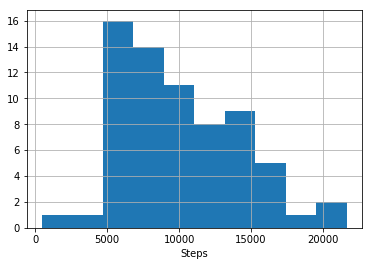

In [3]:
all_steps = df.groupby(['user'])['steps'].mean().reset_index()
all_steps['steps'].hist()
plt.xlabel('Steps')
plt.show()

하루 10,000보를 달성하지 못한 경우 : 57.35%


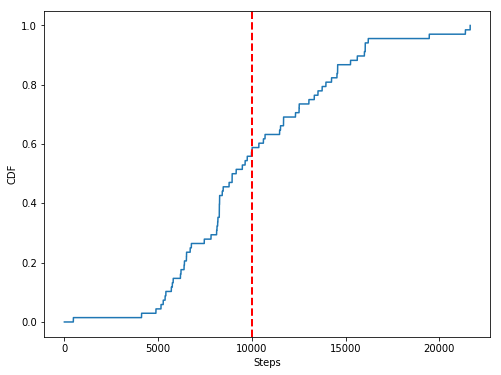

In [4]:
step_list = [int(step) for step in all_steps['steps']]
step_list_count = np.zeros(max(step_list)+1)
for step in step_list:
    step_list_count[int(step)] += 1
step_cumsum = step_list_count.cumsum()
step_cdf = [cumsum/step_cumsum[-1] for cumsum in step_cumsum]
print('하루 10,000보를 달성하지 못한 경우 : {0}%'.format(round(step_cdf[10000]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(step_cdf)
plt.axvline(x=10000, color='r', linestyle='--', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('CDF')
plt.show()

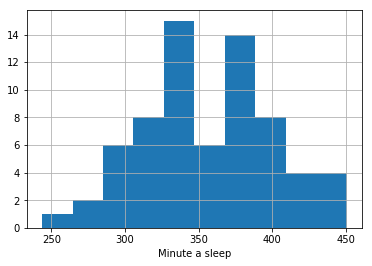

In [5]:
all_sleep = df.groupby(['user'])['minutesAsleep'].mean().reset_index()
all_sleep['minutesAsleep'].hist()
plt.xlabel('Minute a sleep')
plt.show()

하루 수면 시간이 6시간이 안되는 경우 : 48.53%


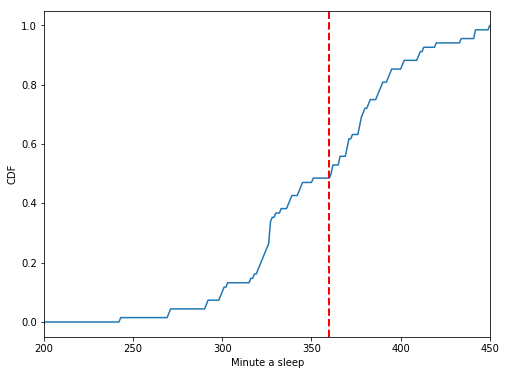

In [6]:
sleep_list = [int(sleep) for sleep in all_sleep['minutesAsleep']]
sleep_list_count = np.zeros(max(sleep_list)+1)
for sleep in sleep_list:
    sleep_list_count[int(sleep)] += 1
sleep_cumsum = sleep_list_count.cumsum()
sleep_cdf = [cumsum/sleep_cumsum[-1] for cumsum in sleep_cumsum]
print('하루 수면 시간이 6시간이 안되는 경우 : {0}%'.format(round(sleep_cdf[360]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(sleep_cdf)
plt.xlim(200, max(all_sleep['minutesAsleep']))
plt.axvline(x=360, color='r', linestyle='--', linewidth=2)
plt.xlabel('Minute a sleep')
plt.ylabel('CDF')
plt.show()

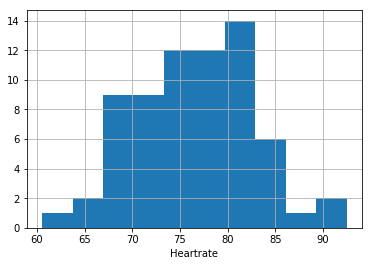

In [7]:
all_heartrate = df.groupby(['user'])['heartrate'].mean().reset_index()
all_heartrate['heartrate'].hist()
plt.xlabel('Heartrate')
plt.show()

하루 평균 심박수가 60 이하인 사람들 : 1.47%


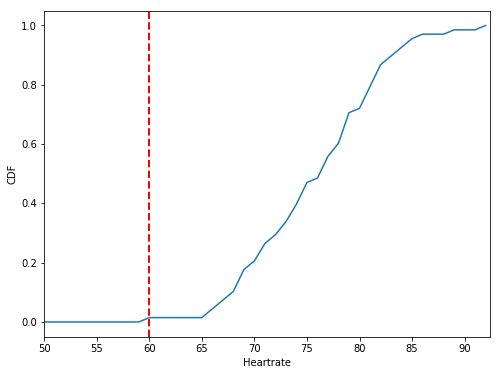

In [8]:
hr_list = [int(hr) for hr in all_heartrate['heartrate']]
hr_list_count = np.zeros(max(hr_list)+1)
for hr in hr_list:
    hr_list_count[int(hr)] += 1
hr_cumsum = hr_list_count.cumsum()
hr_cdf = [cumsum/hr_cumsum[-1] for cumsum in hr_cumsum]
print('하루 평균 심박수가 60 이하인 사람들 : {0}%'.format(round(hr_cdf[60]*100,2)))
plt.figure(figsize=(8,6))
plt.xlim(50, max(all_heartrate['heartrate']))
plt.plot(hr_cdf)
plt.axvline(x=60, color='r', linestyle='--', linewidth=2)
plt.xlabel('Heartrate')
plt.ylabel('CDF')
plt.show()

In [9]:
co = pd.read_csv('./data/relation.csv')
co.fillna(0, inplace = True)
co['date'] = pd.to_datetime(co['date'], format = '%Y-%m-%d')
co['weekday'] = co['date'].apply(lambda x: x.weekday())
co_subset = co[['steps', 'minutesAsleep', 'temperature', 'rainfall', 'windspeed', 'humidity', 'weekday']]

C:\Users\Eun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


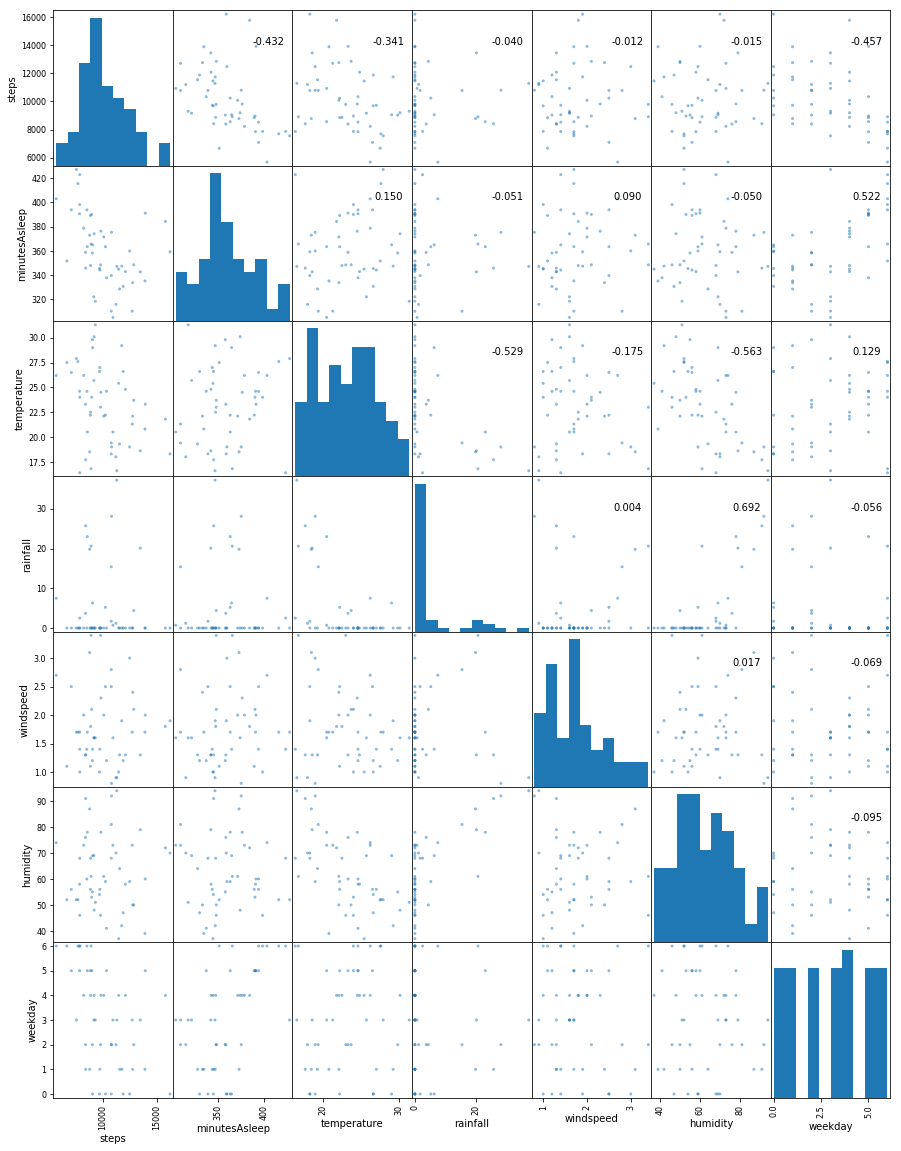

In [10]:
axes = pd.plotting.scatter_matrix(co_subset, figsize = (15, 20), alpha = 0.5)

corr = co_subset.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)) :
    axes[i,j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    
plt.show()

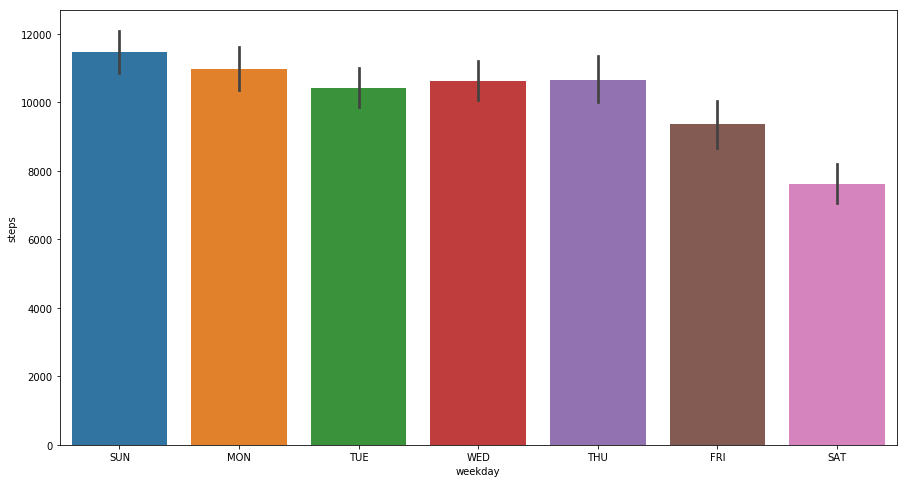

In [11]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['weekday'] = df['date'].apply(lambda x: x.weekday())
plt.figure(figsize=(15,8))

ax = sns.barplot(x='weekday', y='steps', data=df)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

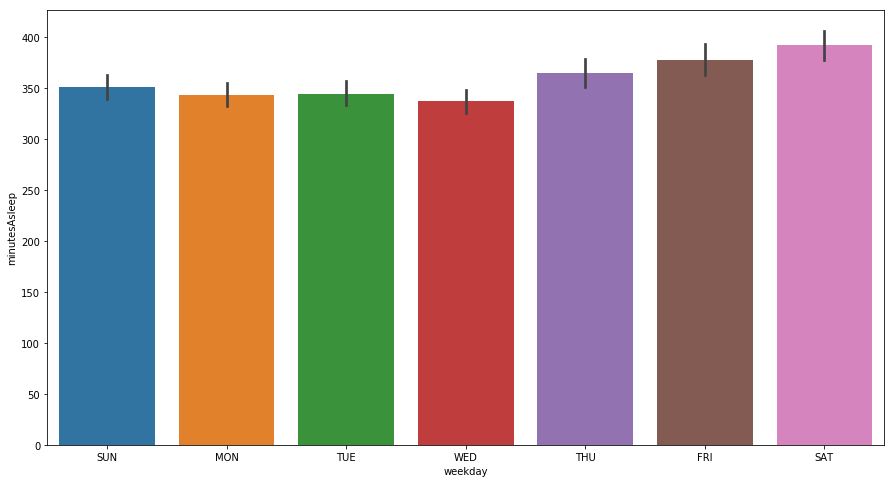

In [12]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='weekday', y='minutesAsleep', data=df)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

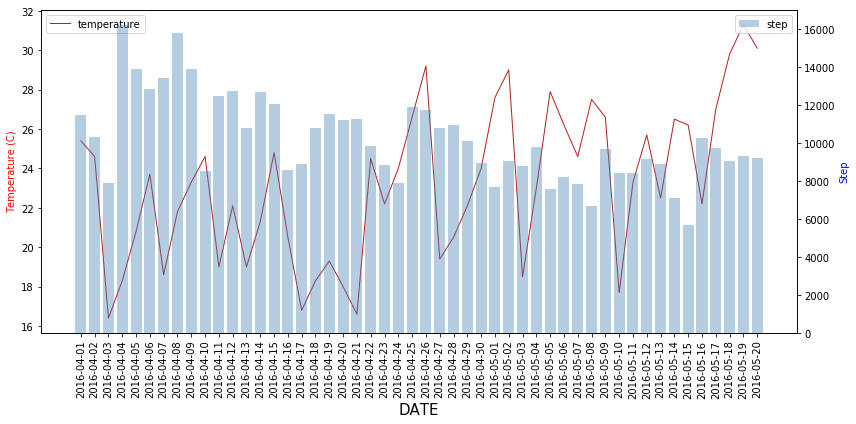

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
ax2 = ax.twinx()

date = co['date'].astype(str)
step = co['steps']
tem = co['temperature']

ax.set_ylabel('Temperature (C)', color = 'r')
ax.plot(date, tem, color = 'firebrick', label = 'temperature', linewidth = 1.0)
ax.legend(loc = 'upper left')

ax2.set_ylabel('Step', color='b')
ax2.bar(date, step, color = 'steelblue', label = 'step', alpha = 0.4)
ax2.legend(loc = 'upper right')

ax.set_xlabel('DATE', size = 15)
ax.set_xticklabels(date, rotation = 'vertical')

fig.tight_layout()
plt.show()

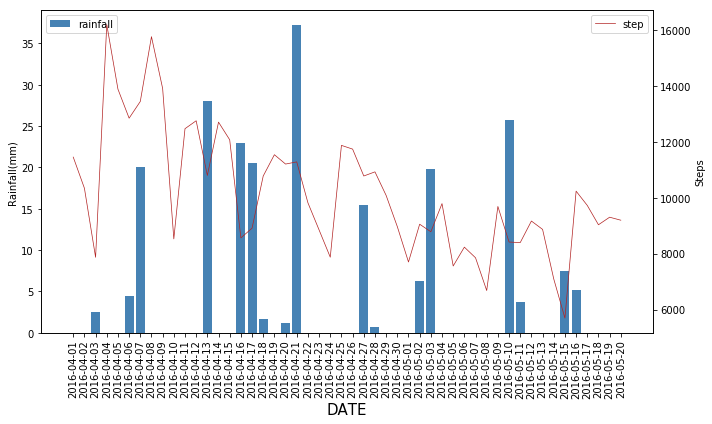

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()

tem = co['rainfall']

ax.set_ylabel('Rainfall(mm)')
ax.bar(date, tem, color = 'steelblue', label = 'rainfall')
ax.legend(loc = 'upper left')

ax2.set_ylabel('Steps')
ax2.plot(date, step, color = 'firebrick', label = 'step', linewidth = 0.7)
ax2.legend(loc = 'upper right')

ax.set_xlabel('DATE', size = 15)
ax.set_xticklabels(date, rotation='vertical')

fig.tight_layout()

plt.show()

In [15]:
df['heartrate'].fillna(0)
use = df[df['heartrate'] > 0][['date', 'user']]

In [16]:
all_user = use.groupby(['date'])['user'].size().reset_index()
all_user['date'] = all_user['date'].astype(str)
all_user.head(3)

,date,user
0,2016-04-01,51
1,2016-04-02,51
2,2016-04-03,65


In [17]:
data = all_user.sort_values(['date'], ascending=[True])
data['user'] = data['user'].diff()
data.fillna(0, inplace = True)
m = data[data['user'] == min(data['user'].astype(int))]['date'].index[0]

30 일 이전 평균 : 95.78%
30 일 이후 평균 : 86.49%


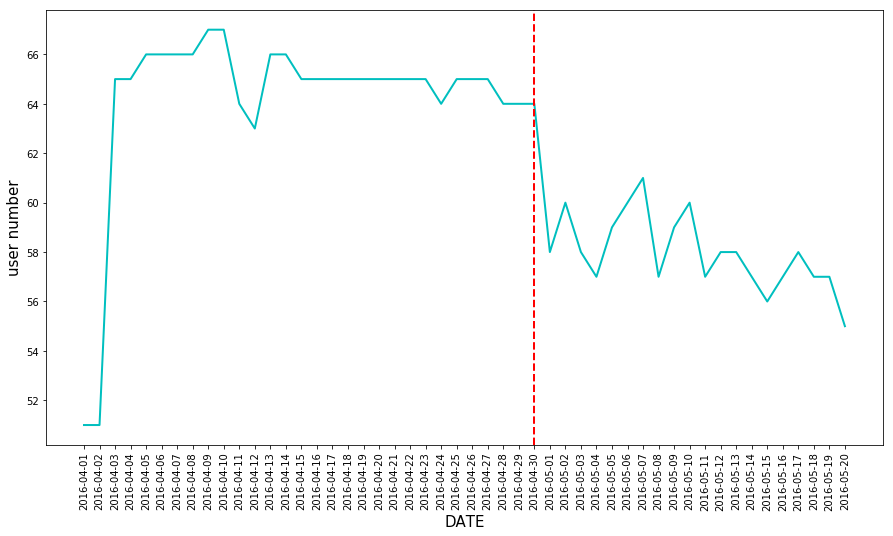

In [18]:
h = max(all_user['user'].astype(int))
f = all_user['user'][:m-1].mean()
a = all_user['user'][m:].mean()

print(m,'일 이전 평균 : {0}%'.format(round(f/h*100,2)))
print(m,'일 이후 평균 : {0}%'.format(round(a/h*100,2)))

plt.figure(figsize=(15,8))

date = all_user['date']
user = all_user['user']

plt.plot(date, user, color = 'c', linewidth = 2)

plt.xlabel('DATE', size = 15)
plt.xticks(date, rotation='vertical')

plt.ylabel('user number', size = 15)

plt.axvline(x=m-1, color='r', linestyle='--', linewidth=2)
plt.show()